In [35]:
import pandas as pd
year18 = pd.read_csv(r"C:\Users\JustinK\Downloads\AFA Data Cleanup 2018 - WR.csv")
year19 = pd.read_csv(r"C:\Users\JustinK\Downloads\AFA Data Cleanup 2019 - LDE.csv")
year21 = pd.read_csv(r"C:\Users\JustinK\Downloads\AFA Data Cleanup 2021 - LDE.csv")
year22 = pd.read_csv(r"C:\Users\JustinK\Downloads\AFA Data Cleanup 2022 - LDE.csv")
columns = ['TACKLES', 'TFL', 'SACKS', 'FF', 'TD', 'INT', 'PASS DEFLECTION', 'CATCH ALLOWED',
                                    'AGE',
                                    'SPEED', 'ACCELERATION', 'STRENGTH', 'AWARENESS',
                                    'AGILITY', 'CATCH', 'CARRY', 'JUMP', 'BREAK TACKLE', 'TACKLE',
                                    'PASS BLOCK', 'RUN BLOCK', 'TOUGHNESS', 'WGT', 'HGTIN',
                                    'PASS RUSHER','RUN STOPPER','BALANCED','HEAVY HITTER','DEFENSIVE ENFORCER',
                                    'TEAM LEADER','TEAM MENTOR',
                                    'NFL ICON','NONE']

rawData = [year19,year21,year22]
dfs = []
for rd in rawData:
    df = pd.DataFrame(rd,columns=columns)
    df = df.dropna(subset=['TACKLES'])
    df = df[~(df['TACKLES'] <= 20)]
    df = df.rename(columns={"PASS DEFLECTION": "DEFL", "CATCH ALLOWED": "CA"})
    dfs.append(df)
all_years = pd.concat(dfs)
correlation_matrix = all_years.corr()

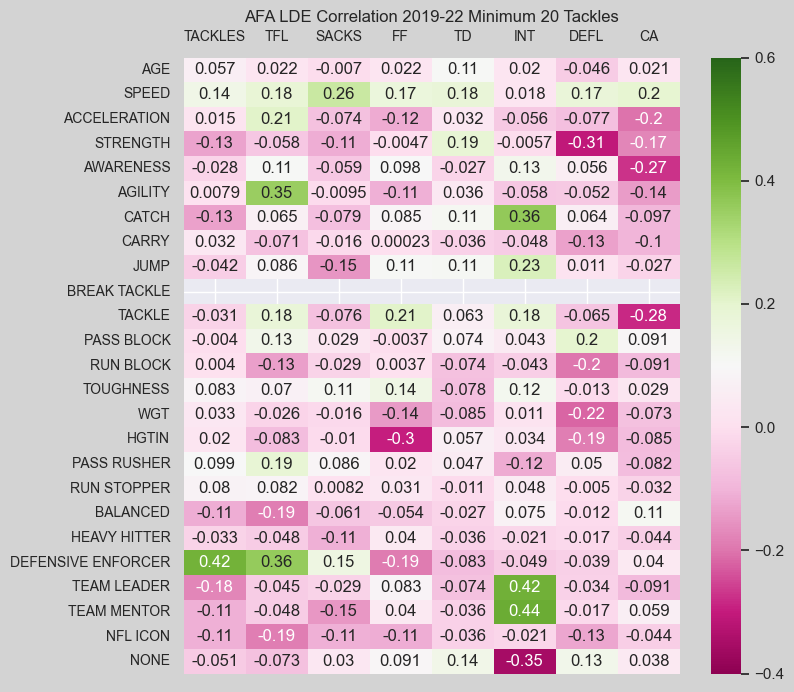

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
rows = ['AGE','SPEED', 'ACCELERATION', 'STRENGTH', 'AWARENESS',
        'AGILITY', 'CATCH', 'CARRY', 'JUMP', 'BREAK TACKLE', 'TACKLE',
        'PASS BLOCK', 'RUN BLOCK', 'TOUGHNESS', 'WGT', 'HGTIN',
        'PASS RUSHER','RUN STOPPER','BALANCED','HEAVY HITTER','DEFENSIVE ENFORCER',
        'TEAM LEADER','TEAM MENTOR',
        'NFL ICON','NONE']
cols = ['TACKLES', 'TFL', 'SACKS', 'FF', 'TD', 'INT', 'DEFL', 'CA']
sns.set(rc={'figure.facecolor':'lightgrey'})
sns.heatmap(correlation_matrix.loc[rows,cols], annot=True, cmap='PiYG', vmin=-.4,vmax=.6)
plt.title("AFA LDE Correlation 2019-22 Minimum 20 Tackles")
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom = False, top = False, labeltop = True)
plt.show()